In [1]:
import cv2
import imutils
from PIL import Image
from matplotlib import pyplot as plt
import json
import copy

from src.OCR.detection.text_detector import TextDetector
from src.OCR.recognition.text_recognizer import TextRecognizer
from src.utils.utility import get_text_image, draw_boxes, find_relative_position, align_images

In [2]:
recognizer = TextRecognizer.getInstance()
detector = TextDetector.getInstance()

Text recognition uses cpu


E0629 15:13:10.751272 32881 analysis_config.cc:125] Please use PaddlePaddle with GPU version.


In [3]:
with open(f"/home/phuc/Documents/Capstone_Project/config/template_form/don_xin_mien_thi.json", 'r') as file:
    template = json.load(file)

template_image = cv2.imread(f"/home/phuc/Documents/Capstone_Project/config/template/don_xin_mien_thi.jpg")

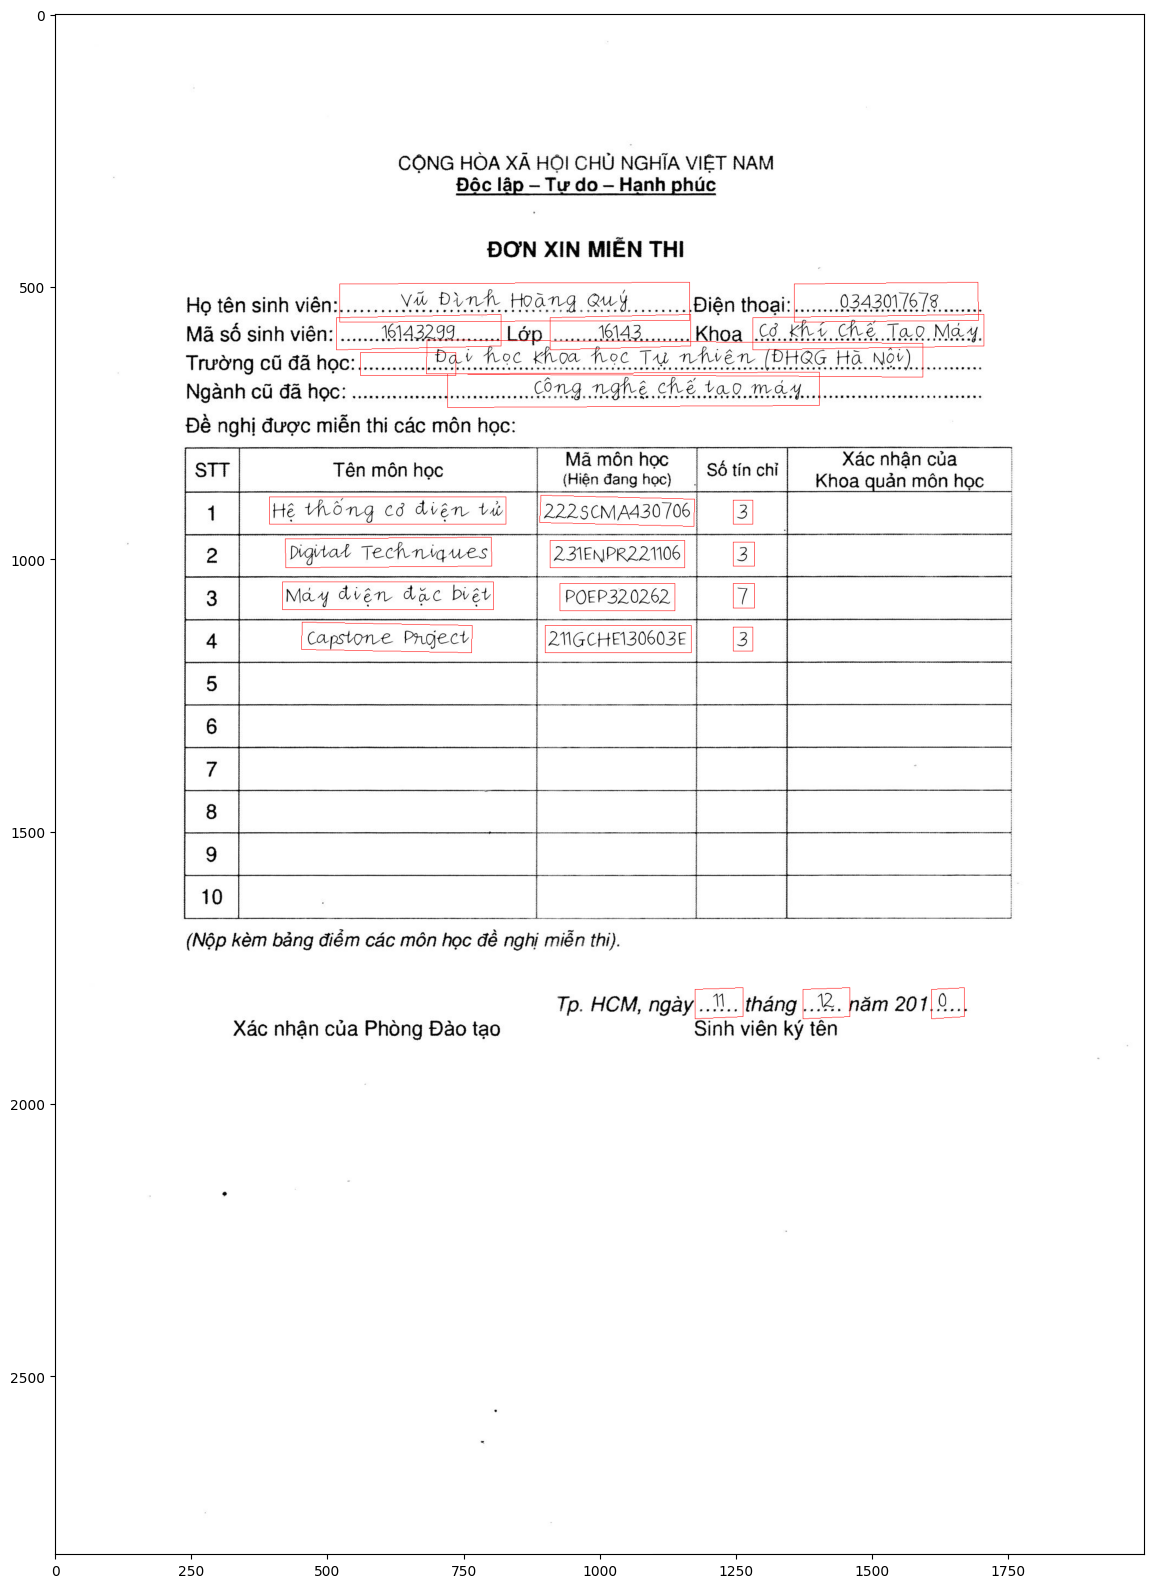

CỘNG HÒA XÃ HỘI CHÙ NGHĨA VIỆT NAM
Độc lập Tự do - Hạnh phúc
ĐƠN XIN MIỄN THI
Họ tên sinh viên vũ Đình Hoàng Quý 0343017678
Mã số sinh viên. 19343,99..0.000 thi chế Tai chế Tao Máy
Đại học khoa học Tụ nhiên / Phá Nói)
Trường cũ đã học:
Công nghe chế tao máy
Ngành cũ đã học:
Đề nghị được miễn thi các môn học:
Mã môn học
Xác nhận của
STT
Tên môn học
Số tín chỉ
(Hiện đang học)
Khoa quản môn học
Hệ thông có điện tứ
222SCMA430706
3
1
2
Digital Techniques
3
2310NPR221106
7
Máy điện đặc biệt
3
POEP320262
3
1
Capstone Project
211GCHE130603E
5
6
7
8
9
10
(Nộp kèm bảng điểm các môn học đề nghị miễn thi)
Tp. HCM, ngày 11 tháng 12 năm 201,000
Xác nhận của Phòng Đào tạo
Sinh viên ký tên


In [4]:
img_path = 'output/font_16_don_xin_mien_thi.jpg'
image = cv2.imread(img_path)
# image = imutils.resize(image, width=2000)
aligned = align_images(image, template_image, debug=False)
# detect all boxes in image
detection = detector.detect(aligned)
detection.reverse()

# for box in detection:
#     top_left = (int(box[0][0]), int(box[0][1]))
#     bottom_right = (int(box[2][0]), int(box[2][1]))
#     cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

answer_box = []

for loc in template:
    for i, answer in enumerate(loc['answer_text']):
        # answer_box = []
        for box in detection:
            temp_box = copy.deepcopy(box)
            if box[0][0] < answer['box'][0] and box[1][0] > answer['box'][0]:
                temp_box[0][0] = answer['box'][0]
                temp_box[3][0] = answer['box'][0]
            if box[0][0] < answer['box'][2] and box[1][0] > answer['box'][2]:
                temp_box[1][0] = answer['box'][2]
                temp_box[2][0] = answer['box'][2]
            area_temp_box = (temp_box[1][0]-temp_box[0][0])*(temp_box[3][1]-temp_box[0][1])
            area_box = (answer['box'][2]-answer['box'][0])*(answer['box'][3]-answer['box'][1])
            if area_temp_box/area_box > 0.1:
                relative_position = find_relative_position(answer['box'], temp_box)
                if relative_position == 0:
                    answer_box.append(temp_box)

image = draw_boxes(aligned, answer_box)

plt.figure(figsize=(18, 20))
plt.imshow(image)
plt.show()

recognition = []
for box in detection:
    # box = padding_box(image, box, left_side = 0.001, right_side = 0.005, top_side = 0.06, bottom_side = 0.1)
    cropped_image = get_text_image(image, box)
    cropped_image = Image.fromarray(cropped_image)
    rec_result = recognizer.recognize(cropped_image)
    recognition.append(rec_result)
    print(rec_result)

In [5]:
# import os
# import cv2

# # Test directory
# raw_images_dir = '/home/phuc/Documents/Capstone_Project/data/written_file/400_DPI'
# images_dir = '/home/phuc/Documents/Capstone_Project/data/written_file/400_DPI_resized'

# if not os.path.exists(f'{images_dir}'):
#     os.makedirs(f'{images_dir}')


# test_images = os.listdir(raw_images_dir)

# for image_name in test_images:
#     img_path = raw_images_dir + '/' + image_name
#     image = cv2.imread(img_path)
#     image = imutils.resize(image, width=2000)

#     cv2.imwrite(f'{images_dir}/{image_name.split(".")[0]}.png', image)

In [5]:
import pandas as pd

subjects_df = pd.read_csv('data/information/subjects.csv')
students_df = pd.read_csv('data/information/students.csv', encoding="utf-8",
             dtype={'dien_thoai': 'str','lop': 'str'})
universities_df = pd.read_csv('data/information/universities.csv')
universities_df
# students_df.columns
# subjects_df.loc[194, 'ma_mon_hoc']
# students_df.loc[4127, 'mssv']

,truong_hoc
0,Đại học Mỹ thuật TP.HCM
1,Đại học Ngân hàng TP.HCM
2,Đại học Ngoại ngữ - Tin học TP.HCM
3,Đại học Ngoại thương - Cơ sở Tp.HCM
4,Đại học Nguyễn Tất Thành
...,...
56,Đại học Kinh tế Kỹ thuật Công nghiệp
57,Đại học Kinh tế Quốc dân
58,Đại học Kiến trúc Hà Nội
59,Đại học Kỹ thuật Lê Quý Đôn


In [9]:
student_info = students_df.iloc[0, :]
student_info['mssv']

'21161059'

In [9]:
if 'mssvs' in students_df.columns:
    print(True)
else:
    print(False)

False
